In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, GRU, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
# Load the dataset

df = pd.read_csv("D:\Fake_news_Project\WELFake_Dataset.csv")

# Display the first few records
df.head()


<>:3: SyntaxWarning: invalid escape sequence '\F'
<>:3: SyntaxWarning: invalid escape sequence '\F'
C:\Users\DELL\AppData\Local\Temp\ipykernel_8540\1957881077.py:3: SyntaxWarning: invalid escape sequence '\F'
  df = pd.read_csv("D:\Fake_news_Project\WELFake_Dataset.csv")


,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [4]:
# Checking for missing values
df.isnull().sum()

# Dropping any missing values if present
df.dropna(inplace=True)

# Combining the title and text columns
df['text'] = df['title'] + " " + df['text']

# Dropping the title column
df.drop(columns=['title'], inplace=True)

# Text cleaning: remove punctuation, convert to lowercase, etc.
import string
df['text'] = df['text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
df['text'] = df['text'].apply(lambda x: x.lower())


<Figure size 800x600 with 0 Axes>

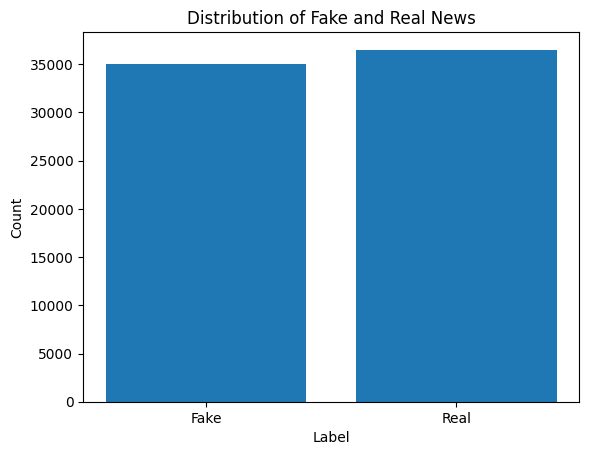

In [8]:
# Checking the distribution of labels in the dataset
counts = df['label'].value_counts()


# Plotting the distribution of fake and real news
plt.figure(figsize=(8, 6))
plt.show()  # Adjusting the size of the plot
plt.bar(counts.index,counts.values)
plt.title('Distribution of Fake and Real News')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Fake', 'Real'])  # Properly label the x-axis
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<Figure size 800x600 with 0 Axes>

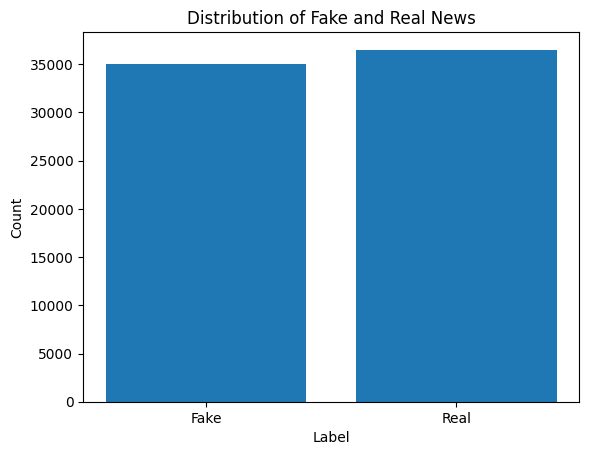

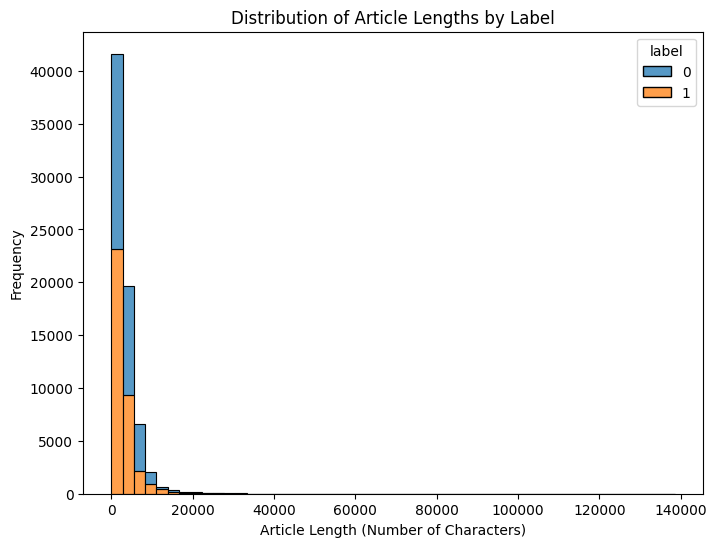

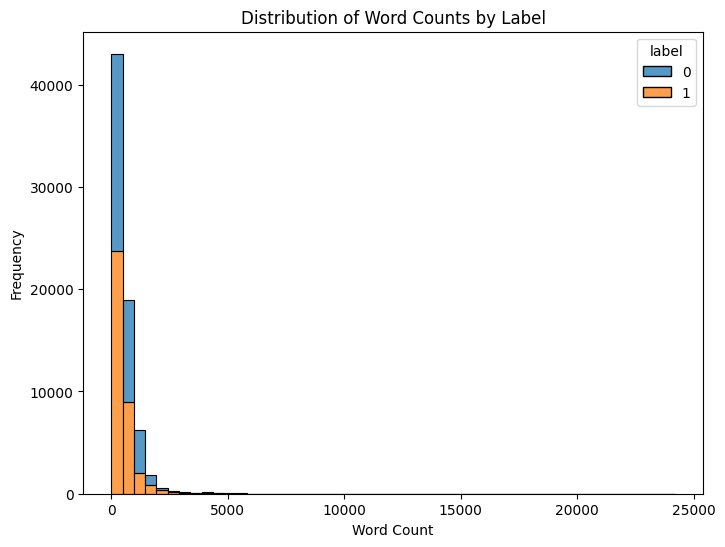

In [9]:
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Downloading NLTK stopwords
nltk.download('stopwords')
nltk.download('punkt')

# Defining stopwords
stop_words = set(stopwords.words('english'))

# 1. Distribution of Classes
counts = df['label'].value_counts()
plt.figure(figsize=(8, 6))
plt.show()  # Adjusting the size of the plot
plt.bar(counts.index,counts.values)
plt.title('Distribution of Fake and Real News')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Fake', 'Real'])  # Properly label the x-axis
plt.show()


# 2. Article Length Analysis
df['text_length'] = df['text'].apply(len)

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='text_length', hue='label', multiple='stack', bins=50)
plt.title('Distribution of Article Lengths by Label')
plt.xlabel('Article Length (Number of Characters)')
plt.ylabel('Frequency')
plt.show()

# 3. Word Count Analysis
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='word_count', hue='label', multiple='stack', bins=50)
plt.title('Distribution of Word Counts by Label')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

# 4. Most Common Words (excluding stopwords)
def plot_most_common_words(text, title, num_words=20):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    word_freq = Counter(tokens)
    common_words = word_freq.most_common(num_words)

    words = [word[0] for word in common_words]
    counts = [word[1] for word in common_words]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=counts, y=words)
    plt.title(title)
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

# Fake news


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Fit and transform the text data
X = tfidf_vectorizer.fit_transform(df['text']).toarray()

# Labels
y = df['label']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (57229, 5000)
Testing data shape: (14308, 5000)


In [11]:
# Model building with LSTM
model = Sequential()

# Adding a Dense layer to increase the dimension of input features
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))

# Adding an LSTM layer
model.add(Embedding(input_dim=5000, output_dim=128, input_length=X_train.shape[1]))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

# Training the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))


d:\Fake_news_Project\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
d:\Fake_news_Project\venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │       320,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 64, 128)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,091,777 (4.16 MB)

 Trainable params: 1,091,777 (4.16 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5


d:\Fake_news_Project\venv\Lib\site-packages\keras\src\optimizers\base_optimizer.py:678: UserWarning: Gradients do not exist for variables ['kernel', 'bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


895/895 ━━━━━━━━━━━━━━━━━━━━ 78s 81ms/step - accuracy: 0.5087 - loss: 0.6933 - val_accuracy: 0.5103 - val_loss: 0.6930
Epoch 2/5
895/895 ━━━━━━━━━━━━━━━━━━━━ 70s 78ms/step - accuracy: 0.5089 - loss: 0.6931 - val_accuracy: 0.5103 - val_loss: 0.6930
Epoch 3/5
895/895 ━━━━━━━━━━━━━━━━━━━━ 73s 82ms/step - accuracy: 0.5118 - loss: 0.6930 - val_accuracy: 0.5103 - val_loss: 0.6930
Epoch 4/5
895/895 ━━━━━━━━━━━━━━━━━━━━ 73s 82ms/step - accuracy: 0.5132 - loss: 0.6928 - val_accuracy: 0.5103 - val_loss: 0.6930
Epoch 5/5
895/895 ━━━━━━━━━━━━━━━━━━━━ 76s 85ms/step - accuracy: 0.5061 - loss: 0.6932 - val_accuracy: 0.5103 - val_loss: 0.6931


In [12]:
# Predictions on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))


448/448 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      7006
           1       0.51      1.00      0.68      7302

    accuracy                           0.51     14308
   macro avg       0.26      0.50      0.34     14308
weighted avg       0.26      0.51      0.34     14308

Confusion Matrix:
 [[   0 7006]
 [   0 7302]]
Accuracy Score:  0.5103438635728264
F1 Score:  0.6757982415548357


d:\Fake_news_Project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Fake_news_Project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Fake_news_Project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [13]:
# Adjusting LSTM units and dropout rates
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Embedding(input_dim=5000, output_dim=128, input_length=X_train.shape[1]))
model.add(LSTM(256, dropout=0.3, recurrent_dropout=0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Re-training the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))


d:\Fake_news_Project\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
d:\Fake_news_Project\venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 64)             │       320,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, 64, 128)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 256)            │       394,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,354,561 (5.17 MB)

 Trainable params: 1,354,561 (5.17 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5


d:\Fake_news_Project\venv\Lib\site-packages\keras\src\optimizers\base_optimizer.py:678: UserWarning: Gradients do not exist for variables ['kernel', 'bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


895/895 ━━━━━━━━━━━━━━━━━━━━ 153s 166ms/step - accuracy: 0.5024 - loss: 0.6938 - val_accuracy: 0.5103 - val_loss: 0.6929
Epoch 2/5
895/895 ━━━━━━━━━━━━━━━━━━━━ 150s 167ms/step - accuracy: 0.5075 - loss: 0.6932 - val_accuracy: 0.5103 - val_loss: 0.6930
Epoch 3/5
895/895 ━━━━━━━━━━━━━━━━━━━━ 146s 163ms/step - accuracy: 0.5028 - loss: 0.6932 - val_accuracy: 0.5103 - val_loss: 0.6930
Epoch 4/5
895/895 ━━━━━━━━━━━━━━━━━━━━ 155s 173ms/step - accuracy: 0.5080 - loss: 0.6931 - val_accuracy: 0.5103 - val_loss: 0.6930
Epoch 5/5
895/895 ━━━━━━━━━━━━━━━━━━━━ 143s 160ms/step - accuracy: 0.5090 - loss: 0.6931 - val_accuracy: 0.5103 - val_loss: 0.6929
